In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Step 1: Inspect the dataset
print("Shape of the dataset:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

# Step 2: Handle missing data (if any) - No missing values found in this dataset
# No action needed as there are no missing values

# Step 3: Convert categorical features
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Label encode binary columns
label_encoder = LabelEncoder()
binary_columns = ['Attrition', 'Gender', 'OverTime']
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-hot encode other categorical columns
one_hot_columns = [col for col in categorical_columns if col not in binary_columns]
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Step 4: Scale numerical features
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the processed dataset
print(df.head())


Shape of the dataset: (1470, 35)
Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany      

In [12]:
data.shape

(1470, 43)

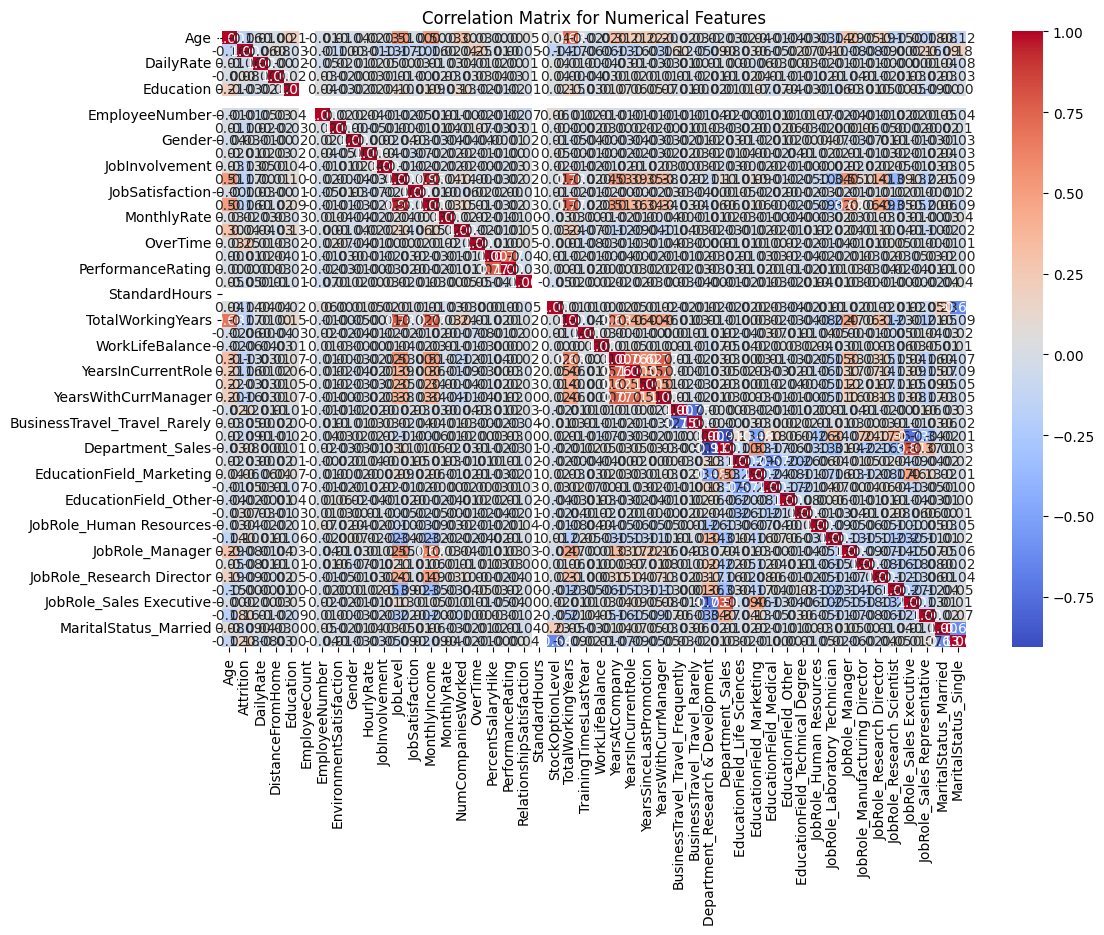

Selected Features: Index(['Age', 'JobInvolvement', 'NumCompaniesWorked', 'OverTime',
       'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'MaritalStatus_Single'],
      dtype='object')
                              Feature  Ranking
0                                 Age        1
25                 YearsInCurrentRole        1
15                           OverTime        1
14                 NumCompaniesWorked        1
26            YearsSinceLastPromotion        1
9                      JobInvolvement        1
41          JobRole_Research Director        1
44       JobRole_Sales Representative        1
46               MaritalStatus_Single        1
21                  TotalWorkingYears        1
11                    JobSatisfaction        2
6             EnvironmentSatisfaction        3
23                    WorkLifeBalance        4
27               YearsWithCurrManager        5
2          

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Correlation Analysis (numerical features)
# Correlation matrix for numerical features
corr_matrix = df.corr()

# Plot heatmap for correlation analysis
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Step 2: Feature Engineering
# Engineer a new feature "Tenure" (YearsAtCompany - YearsSinceLastPromotion)
df['Tenure'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']

# Engineer "WorkLifeBalance_Score" using existing WorkLifeBalance
df['WorkLifeBalance_Score'] = df['WorkLifeBalance'] * df['JobSatisfaction']

# Step 3: Feature Selection using Recursive Feature Elimination (RFE)
# Define the target variable and features
X = df.drop(['Attrition'], axis=1)  # Features
y = df['Attrition']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=10)  # Selecting top 10 features
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Display RFE ranking of all features
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(feature_ranking)


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models



# Define features and target
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 2: Neural Network Model
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Predict and evaluate Neural Network
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))


Random Forest Accuracy: 0.8741496598639455
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       255
         1.0       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Neural Network Accuracy: 0.8367346938775511
Neural Network Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       255
         1.0       0.35      0.28      0.31        39

    accuracy                           0.84       294
   macro avg       0.62      0.60      0.61       294
weighted avg       0.82      0.84      0.83       294



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
rf_params = {
    'n_estimators': [100, 200],           # Number of trees in the forest
    'max_depth': [10, 20, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5]           # Minimum samples required to split an internal node
}

# Use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print("Best Parameters for Random Forest:", rf_grid.best_params_)

# Evaluate the tuned model
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print("Random Forest Accuracy after tuning:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report after tuning:\n", classification_report(y_test, y_pred_rf))


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy after tuning: 0.8741496598639455
Random Forest Classification Report after tuning:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       255
         1.0       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.6 MB/s eta 0:00:00
Random Forest Evaluation:
Accuracy: 0.8741496598639455
Precision: 0.75
Recall: 0.07692307692307693
F1-Score: 0.13953488372093023
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       255
         1.0       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



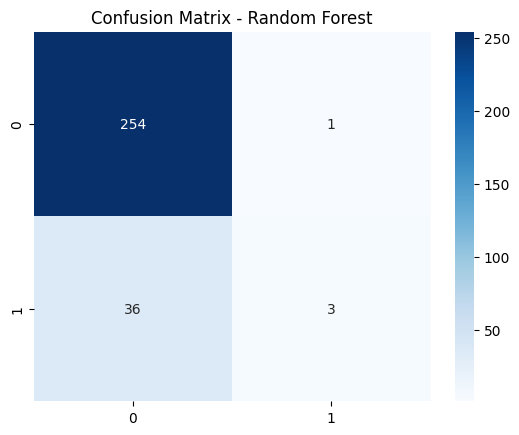

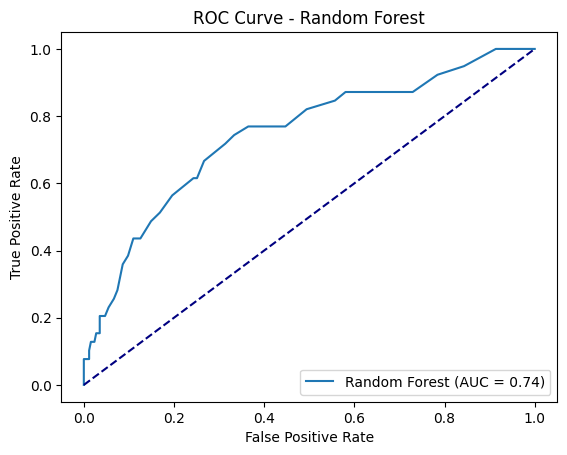

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Neural Network Evaluation:
Accuracy: 0.8639455782312925
Precision: 0.4864864864864865
Recall: 0.46153846153846156
F1-Score: 0.47368421052631576
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       255
         1.0       0.49      0.46      0.47        39

    accuracy                           0.86       294
   macro avg       0.70      0.69      0.70       294
weighted avg       0.86      0.86      0.86       294

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


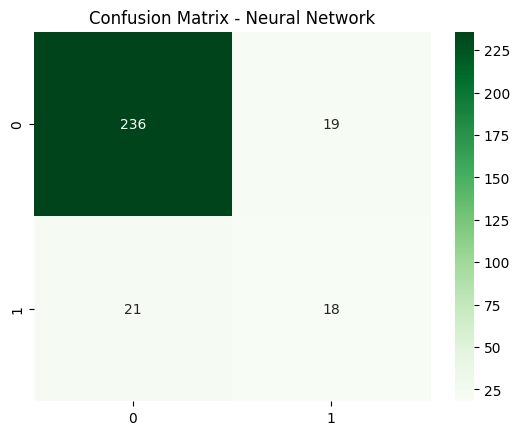

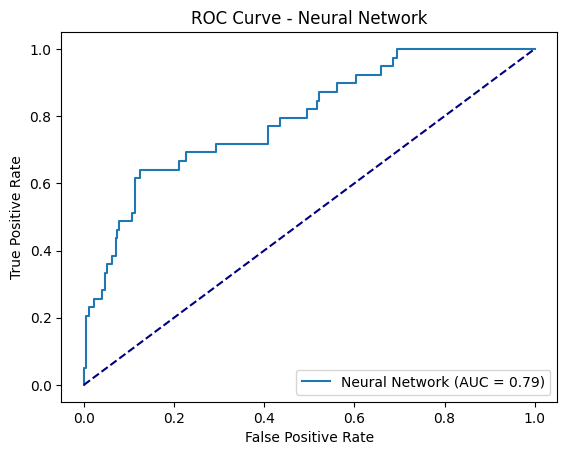

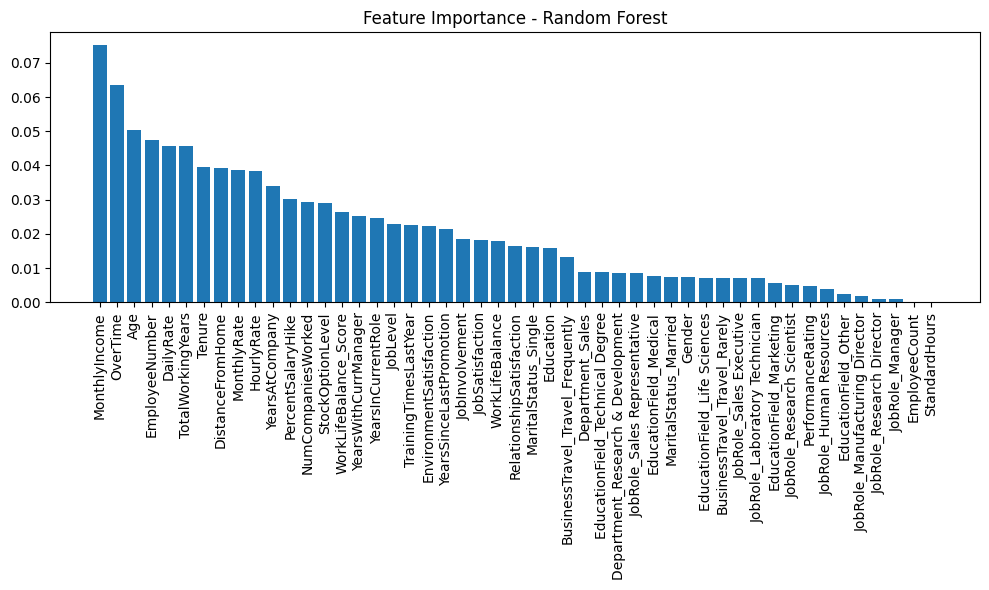

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [19]:
!pip install shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report
import shap
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features and target
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 1: Evaluate Random Forest
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 1: ROC-AUC for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

# Step 2: Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Step 2: ROC Curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


# Step 1: Train Neural Network Model
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Neural Network
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile Neural Network
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Predictions for Neural Network
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype('int32')

# Step 1: Evaluate Neural Network
print("Neural Network Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("F1-Score:", f1_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

# Step 1: ROC-AUC for Neural Network
nn_roc_auc = roc_auc_score(y_test, model.predict(X_test_scaled))
fpr_nn, tpr_nn, _ = roc_curve(y_test, model.predict(X_test_scaled))

# Step 2: Confusion Matrix for Neural Network
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Neural Network')
plt.show()

# Step 2: ROC Curve for Neural Network
plt.figure()
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()


# Step 3: Feature Importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


# Step 3: SHAP Values for Random Forest
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values[1], X_test, feature_names=feature_names)


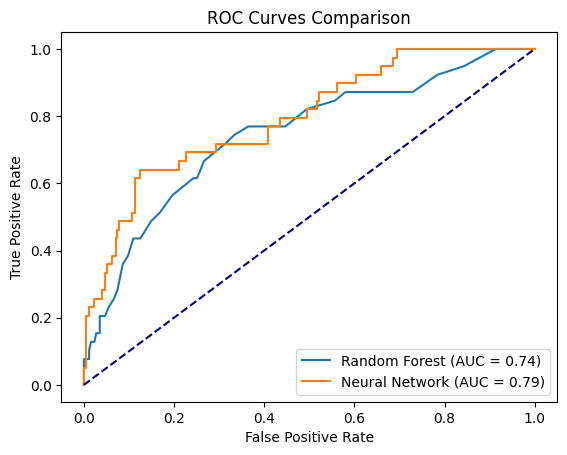

In [20]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()
